## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = '../data/Mouse_metadata.csv'
study_results_path = '../data/Study_results.csv'

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_results = study_results.merge(mouse_metadata, on = 'Mouse ID')

In [2]:
#check column headers for both datasets 
mouse_metadata.columns
mouse_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Mouse ID      249 non-null    object
 1   Drug Regimen  249 non-null    object
 2   Sex           249 non-null    object
 3   Age_months    249 non-null    int64 
 4   Weight (g)    249 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 9.9+ KB


In [3]:
# Checking the number of mice.
study_results.columns
study_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 59.3+ KB


In [4]:
# Display the data table for preview
mouse_study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_id_dups = mouse_study_results[mouse_study_results[['Mouse ID', 'Timepoint']].duplicated() == True]
mouse_id_dups

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID & Timepoint mix.
mouse_study_results.drop_duplicates(subset=['Mouse ID', 'Timepoint'])

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [7]:
# Removing the mouse with duplicated data completelly
mouse_study_results = mouse_study_results[~mouse_study_results['Mouse ID'].str.match('g989')]
mouse_study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mean = mouse_study_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = mouse_study_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = mouse_study_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_deviation = mouse_study_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
SEM = mouse_study_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# This method is the most straighforward, creating multiple series and putting them all together at the end.

summary_statistics_1 = pd.DataFrame({'mean': mean,
                                     'median': median, 
                                     'var': variance, 
                                     'std': standard_deviation, 
                                     'sem': SEM})
summary_statistics_1


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
summary_statistics_2 = mouse_study_results.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
summary_statistics_2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice')

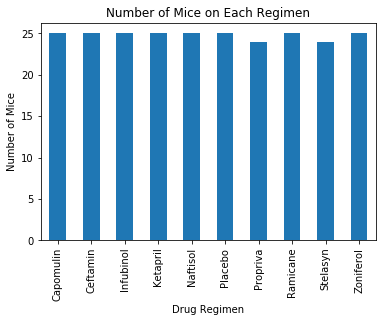

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

grp_mice_treatment = mouse_study_results.groupby(["Drug Regimen"])
mice_per_treatment = grp_mice_treatment[["Mouse ID"]].nunique()

mice_treat_plot = mice_per_treatment.plot(kind="bar", title="Number of Mice on Each Regimen", legend=False)
mice_treat_plot.set_ylabel("Number of Mice")

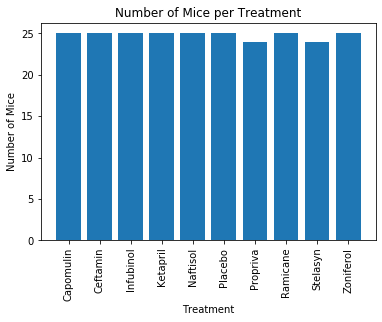

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
num_mice = mice_per_treatment['Mouse ID'].to_list()
treatment = mice_per_treatment.index
plt.title("Number of Mice per Treatment")
plt.xlabel("Treatment")
plt.ylabel("Number of Mice")
plt.xticks(rotation=90)
plt.bar(treatment, num_mice)
plt.show()


In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
grp_mice_gender = mouse_study_results.groupby(['Sex'])
mice_gender = grp_mice_gender[['Mouse ID']].count()
mice_gender

,Mouse ID
Sex,
Female,922
Male,958


Text(0, 0.5, '')

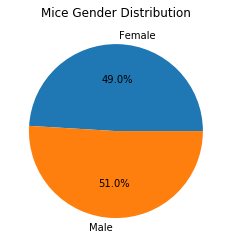

In [13]:
mice_gender_plot = mice_gender.plot(y='Mouse ID', kind='pie', autopct='%1.1f%%', title='Mice Gender Distribution', legend=False)
mice_gender_plot.set_ylabel('')

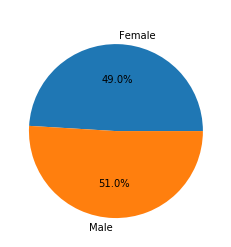

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = mice_gender.index
sizes = mice_gender["Mouse ID"].to_list()

plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.title(" ")
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = mouse_study_results.groupby('Mouse ID')['Timepoint'].max()
max_timepoint

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 248, dtype: int64

In [16]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_mouse_study_results = pd.merge(max_timepoint, mouse_study_results, how='left', on='Timepoint')
merged_mouse_study_results

,Timepoint,Mouse ID,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,45,b128,38.982878,2,Capomulin,Female,9,22
1,45,h246,74.104086,2,Ketapril,Male,13,30
2,45,p189,75.294936,4,Ketapril,Male,8,28
3,45,b559,73.051363,1,Naftisol,Male,20,26
4,45,y260,62.909441,4,Ketapril,Female,7,25
...,...,...,...,...,...,...,...,...
39991,45,l897,38.846876,1,Capomulin,Male,17,19
39992,45,t565,34.455298,0,Capomulin,Female,20,17
39993,45,i557,47.685963,1,Capomulin,Female,1,24
39994,45,m957,33.329098,1,Capomulin,Female,3,19


In [17]:
cap_regimen = merged_mouse_study_results.loc[merged_mouse_study_results['Drug Regimen'] == 'Capomulin']
ram_regimen = merged_mouse_study_results.loc[merged_mouse_study_results['Drug Regimen'] == 'Ramicane']
inf_regimen = merged_mouse_study_results.loc[merged_mouse_study_results['Drug Regimen'] == 'Infubinol']
cef_regimen = merged_mouse_study_results.loc[merged_mouse_study_results['Drug Regimen'] == 'Ceftamin']
cap_regimen

,Timepoint,Mouse ID,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,45,b128,38.982878,2,Capomulin,Female,9,22
110,45,r554,32.377357,3,Capomulin,Female,8,17
111,45,s185,23.343598,1,Capomulin,Female,3,17
112,45,b742,38.939633,0,Capomulin,Male,7,21
113,45,x401,28.484033,0,Capomulin,Female,16,15
...,...,...,...,...,...,...,...,...
39991,45,l897,38.846876,1,Capomulin,Male,17,19
39992,45,t565,34.455298,0,Capomulin,Female,20,17
39993,45,i557,47.685963,1,Capomulin,Female,1,24
39994,45,m957,33.329098,1,Capomulin,Female,3,19


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
cap_tumor_vol = cap_regimen['Tumor Volume (mm3)']
ram_tumor_vol = ram_regimen['Tumor Volume (mm3)']
inf_tumor_vol = inf_regimen['Tumor Volume (mm3)']
cef_tumor_vol = cef_regimen['Tumor Volume (mm3)']

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles_cap = cap_tumor_vol.quantile([.25,.5,.75])
lowerq_cap = quartiles_cap[0.25]
upperq_cap = quartiles_cap[0.75]
iqr_cap = upperq_cap-lowerq_cap
lower_bound_cap = lowerq_cap - (1.5*iqr_cap)
upper_bound_cap = upperq_cap + (1.5*iqr_cap)

quartiles_ram = ram_tumor_vol.quantile([.25,.5,.75])
lowerq_ram = quartiles_ram[0.25]
upperq_ram = quartiles_ram[0.75]
iqr_ram = upperq_ram-lowerq_ram
lower_bound_ram = lowerq_ram - (1.5*iqr_ram)
upper_bound_ram = upperq_ram + (1.5*iqr_ram)

quartiles_inf = inf_tumor_vol.quantile([.25,.5,.75])
lowerq_inf = quartiles_inf[0.25]
upperq_inf = quartiles_inf[0.75]
iqr_inf = upperq_inf-lowerq_inf
lower_bound_inf = lowerq_inf - (1.5*iqr_inf)
upper_bound_inf = upperq_inf + (1.5*iqr_inf)

quartiles_cef = cef_tumor_vol.quantile([.25,.5,.75])
lowerq_cef = quartiles_cef[0.25]
upperq_cef = quartiles_cef[0.75]
iqr_cef = upperq_cef-lowerq_cef
lower_bound_cef = lowerq_cef - (1.5*iqr_cef)
upper_bound_cef = upperq_cef + (1.5*iqr_cef)

    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    
outlier_cap = cap_regimen.loc[(cap_regimen["Tumor Volume (mm3)"] < lower_bound_cap) | 
                              (cap_regimen["Tumor Volume (mm3)"] > upper_bound_cap)]

outlier_ram = ram_regimen.loc[(ram_regimen["Tumor Volume (mm3)"] < lower_bound_ram) | 
                              (ram_regimen["Tumor Volume (mm3)"] > upper_bound_ram)]

outlier_inf = inf_regimen.loc[(inf_regimen["Tumor Volume (mm3)"] < lower_bound_inf) | 
                              (inf_regimen["Tumor Volume (mm3)"] > upper_bound_inf)]

outlier_cef = cef_regimen.loc[(cef_regimen["Tumor Volume (mm3)"] < lower_bound_cef) | 
                              (cef_regimen["Tumor Volume (mm3)"] > upper_bound_cef)]
print(outlier_cap)
print(outlier_ram)
print(outlier_inf)
print(outlier_cef)

       Timepoint Mouse ID  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
111           45     s185           23.343598                 1    Capomulin   
241           45     s185           23.343598                 1    Capomulin   
371           45     s185           23.343598                 1    Capomulin   
501           45     s185           23.343598                 1    Capomulin   
801           45     s185           23.343598                 1    Capomulin   
...          ...      ...                 ...               ...          ...   
38764         45     s185           23.343598                 1    Capomulin   
39587         45     s185           23.343598                 1    Capomulin   
39717         45     s185           23.343598                 1    Capomulin   
39847         45     s185           23.343598                 1    Capomulin   
39977         45     s185           23.343598                 1    Capomulin   

          Sex  Age_months  Weight (g)  

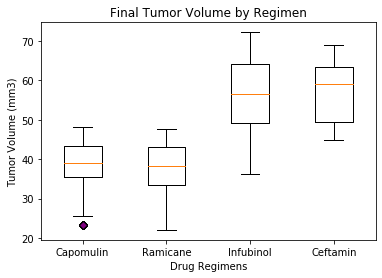

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tumor_data = [cap_tumor_vol, ram_tumor_vol, inf_tumor_vol, cef_tumor_vol]
purple_diamond = dict(markerfacecolor='purple', marker='D')
labels = treatments
plt.boxplot(tumor_data, flierprops=purple_diamond, labels=labels)
plt.title("Final Tumor Volume by Regimen")
plt.xlabel("Drug Regimens")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


## Line and Scatter Plots

In [20]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_treatment = mouse_study_results.loc[mouse_study_results['Drug Regimen'] == 'Capomulin']
capomulin_treatment

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [21]:
i557_mouse = capomulin_treatment.loc[capomulin_treatment["Mouse ID"] == "i557"]
i557_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1858,i557,0,45.000000,0,Capomulin,Female,1,24
1859,i557,5,42.261665,0,Capomulin,Female,1,24
1860,i557,10,42.992077,0,Capomulin,Female,1,24
1861,i557,15,43.529876,0,Capomulin,Female,1,24
1862,i557,20,43.967895,0,Capomulin,Female,1,24
1863,i557,25,44.596219,0,Capomulin,Female,1,24
1864,i557,30,45.261384,0,Capomulin,Female,1,24
1865,i557,35,45.941949,0,Capomulin,Female,1,24
1866,i557,40,46.821070,1,Capomulin,Female,1,24
1867,i557,45,47.685963,1,Capomulin,Female,1,24


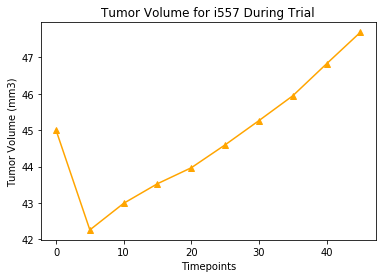

In [22]:
i557_mouse_timepoints = i557_mouse['Timepoint'].to_list()
i557_mouse_tumor_vol = i557_mouse['Tumor Volume (mm3)'].to_list()
plt.plot(i557_mouse_timepoints, i557_mouse_tumor_vol, color='orange', marker='^')
plt.title('Tumor Volume for i557 During Trial')
plt.xlabel('Timepoints')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [23]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
grp_mice_avg_tumor = capomulin_treatment.groupby('Mouse ID').mean()
avg_tumor_size = grp_mice_avg_tumor['Tumor Volume (mm3)']
avg_tumor_size

Mouse ID
b128    41.963636
b742    40.083699
f966    36.505973
g288    41.990097
g316    44.613344
i557    44.805810
i738    39.141053
j119    44.465236
j246    43.216925
l509    44.434474
l897    42.507261
m601    34.847470
m957    39.049816
r157    45.798970
r554    36.509212
r944    43.367364
s185    34.559143
s710    42.803733
t565    39.328725
u364    39.887495
v923    41.581595
w150    41.384825
w914    41.352452
x401    36.182040
y793    38.506829
Name: Tumor Volume (mm3), dtype: float64

In [24]:
grp_mice_weight = capomulin_treatment.groupby('Mouse ID').mean()
avg_mouse_weight = grp_mice_weight['Weight (g)']
avg_mouse_weight

Mouse ID
b128    22.0
b742    21.0
f966    17.0
g288    19.0
g316    22.0
i557    24.0
i738    20.0
j119    23.0
j246    21.0
l509    21.0
l897    19.0
m601    17.0
m957    19.0
r157    25.0
r554    17.0
r944    25.0
s185    17.0
s710    23.0
t565    17.0
u364    17.0
v923    21.0
w150    23.0
w914    21.0
x401    15.0
y793    17.0
Name: Weight (g), dtype: float64

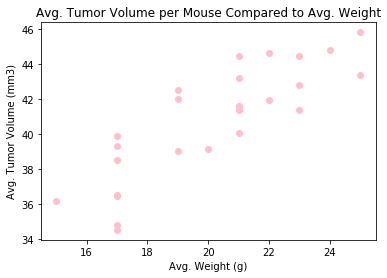

In [25]:
plt.scatter(avg_mouse_weight, avg_tumor_size, color='pink', marker='o')
plt.title('Avg. Tumor Volume per Mouse Compared to Avg. Weight')
plt.xlabel('Avg. Weight (g)')
plt.ylabel('Avg. Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

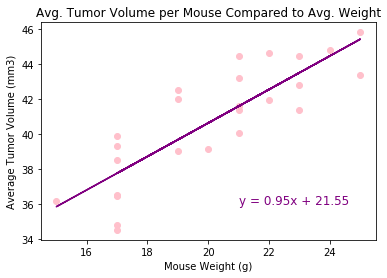

The correlation coefficient is 0.8419363424694717


In [26]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

cor_coeff = st.pearsonr(avg_mouse_weight,avg_tumor_size)[0]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(avg_mouse_weight, avg_tumor_size)
regress_values = []
for weight in avg_mouse_weight:
    regress_values.append(weight * slope + intercept)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(avg_mouse_weight, avg_tumor_size, color="pink", marker='o')
plt.plot(avg_mouse_weight,regress_values,"r-", color="purple")
plt.annotate(line_eq,(21,36),fontsize=12,color="purple")
plt.title("Avg. Tumor Volume per Mouse Compared to Avg. Weight")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()
print(f"The correlation coefficient is {cor_coeff}")
